In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

In [22]:
data = [135122.3, 122680.1, 141305.2, 134620.4, 130820.6, 127486.9, 129846.2, 123134.9, 119857.8, 116861.8, 117067.8, 109959.5, 106982.4, 
        104346.3, 104334, 98067.8, 95435.8, 92990.5, 92840.6, 87897.9, 85747.4, 83258.8, 82580.9, 77658.7, 75921.9, 74492.4, 73696.6, 69569.1,
        67998.6, 66719.3]
# data = [ 141305.2, 134620.4, 130820.6, 127486.9, 129846.2, 123134.9, 119857.8, 116861.8, 117067.8, 109959.5, 106982.4, 
#         104346.3, 104334, 98067.8, 95435.8, 92990.5, 92840.6, 87897.9, 85747.4, 83258.8, 82580.9, 77658.7, 75921.9, 74492.4, 73696.6, 69569.1,
#         67998.6, 66719.3]

data = np.array(data, dtype = np.float) 

data = data[::-1]

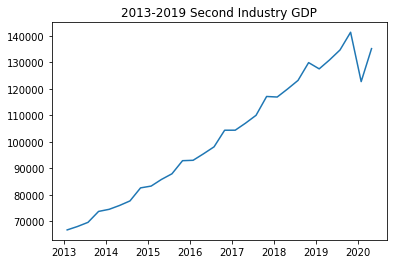

In [23]:
data=pd.Series(data)
data.index = pd.Index(pd.date_range('20130101',periods=30,freq='3M'))

plt.figsize = (12,8)
plt.title('2013-2019 Second Industry GDP')
plt.plot(data)
plt.show()

<Figure size 432x288 with 0 Axes>

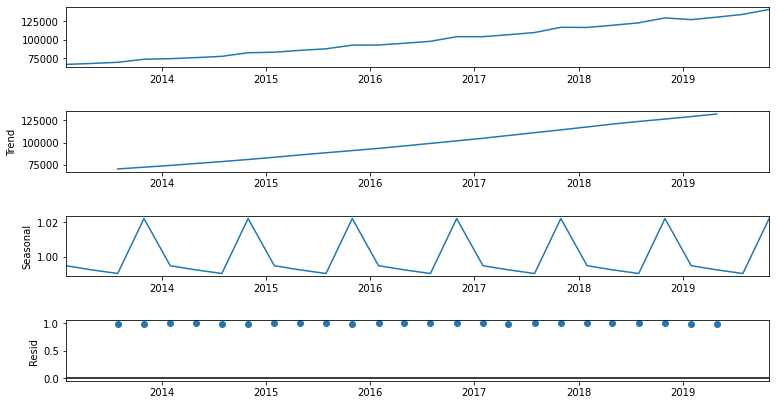

In [5]:
decomposition = seasonal_decompose(data, model='multiplicative', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

<Figure size 432x288 with 0 Axes>

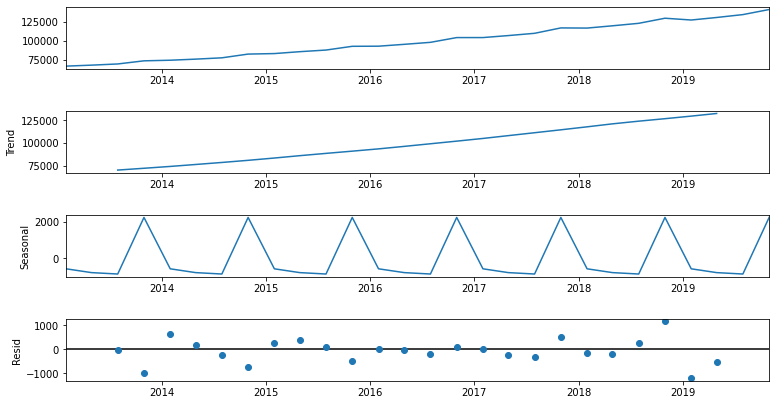

In [6]:
decomposition = seasonal_decompose(data, model='additive', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

In [7]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 4).mean()
    rolstd = timeseries.rolling(window = 4).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    # plt.title('mean and std')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

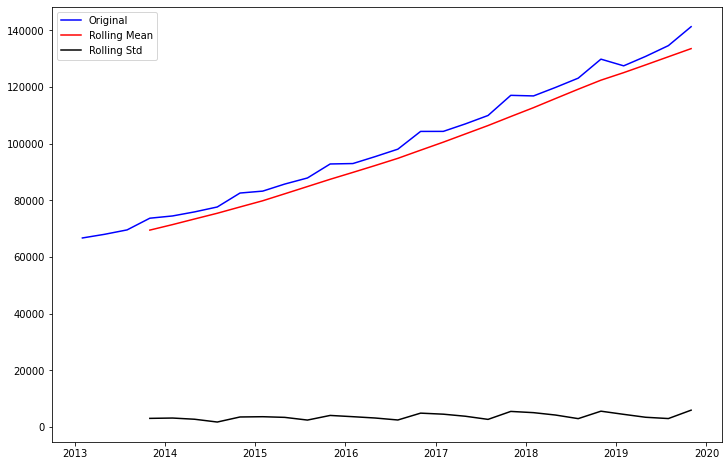

Results of Dickey-Fuller Test:
Test Statistic                 -0.524757
p-value                         0.887094
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
dtype: float64
Test Statistic                 -0.524757
p-value                         0.887094
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
dtype: float64
Test Statistic                 -0.524757
p-value                         0.887094
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [8]:
test_stationarity(data)

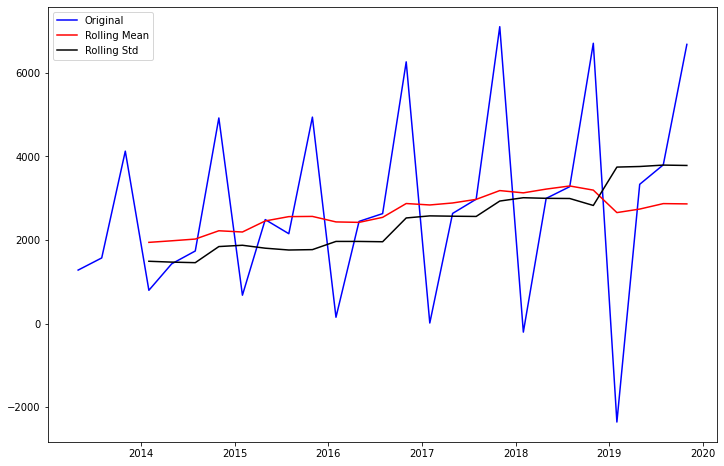

Results of Dickey-Fuller Test:
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
dtype: float64
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
dtype: float64
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [9]:
data_diff1 = data.diff(1)
test_stationarity(data_diff1.dropna(inplace=False))

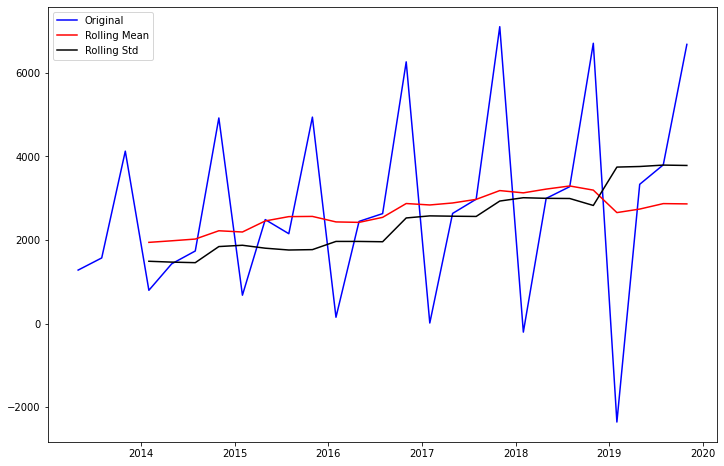

Results of Dickey-Fuller Test:
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
dtype: float64
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
dtype: float64
Test Statistic                 -0.814207
p-value                         0.814913
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [10]:
data_diff4 = data.diff(4)
test_stationarity(data_diff1.dropna(inplace=False))

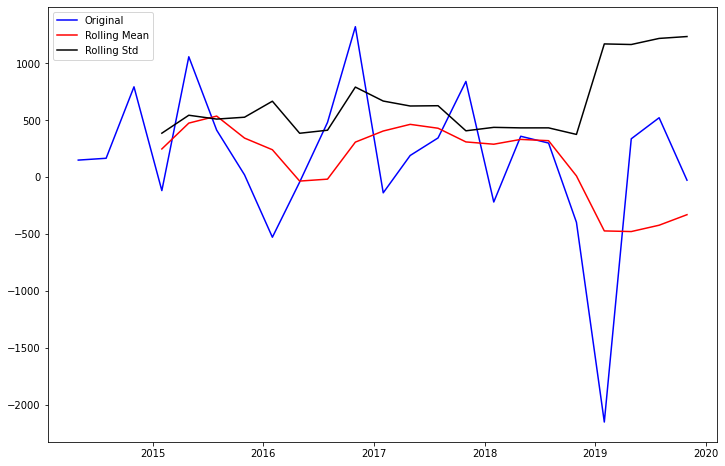

Results of Dickey-Fuller Test:
Test Statistic                 -1.144165
p-value                         0.697142
#Lags Used                      8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
dtype: float64
Test Statistic                 -1.144165
p-value                         0.697142
#Lags Used                      8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
dtype: float64
Test Statistic                 -1.144165
p-value                         0.697142
#Lags Used                      8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [11]:
data_diff1_4 = data_diff1.diff(4)
test_stationarity(data_diff1_4.dropna(inplace=False))

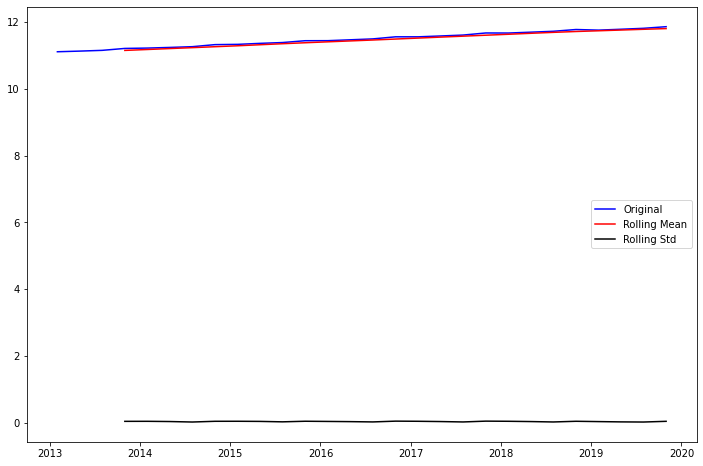

Results of Dickey-Fuller Test:
Test Statistic                 -1.775639
p-value                         0.392622
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                 -1.775639
p-value                         0.392622
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                 -1.775639
p-value                         0.392622
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [12]:
data_log = np.log(data)
test_stationarity(data_log)

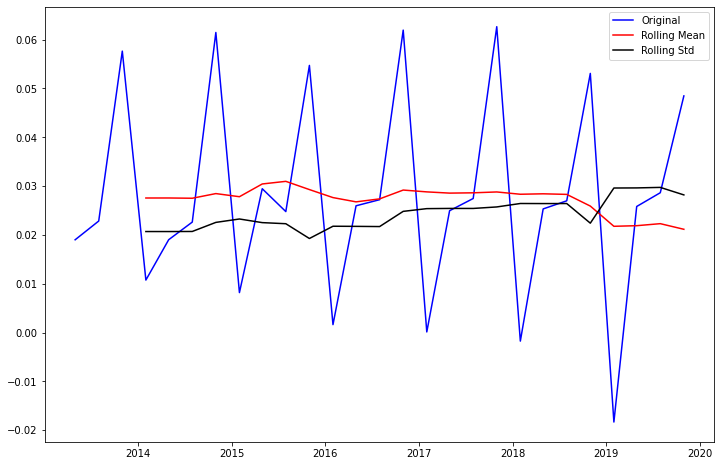

Results of Dickey-Fuller Test:
Test Statistic                  0.697426
p-value                         0.989786
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
dtype: float64
Test Statistic                  0.697426
p-value                         0.989786
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
dtype: float64
Test Statistic                  0.697426
p-value                         0.989786
#Lags Used                      8.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [13]:
data_log_1 = data_log.diff(1)
test_stationarity(data_log_1.dropna(inplace=False))

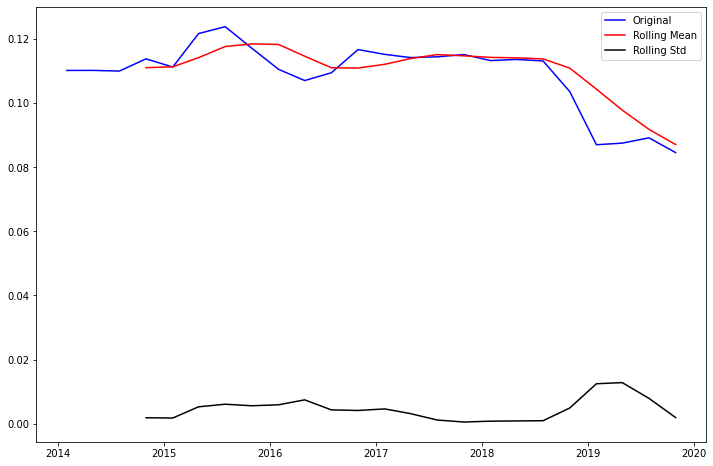

Results of Dickey-Fuller Test:
Test Statistic                  0.156777
p-value                         0.969730
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
dtype: float64
Test Statistic                  0.156777
p-value                         0.969730
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
dtype: float64
Test Statistic                  0.156777
p-value                         0.969730
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [14]:
data_log_4 = data_log.diff(4)
test_stationarity(data_log_4.dropna(inplace=False))

In [16]:
p =d = q = range(0, 3)
# d = [4, 4, 4]
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 0, 2, 4)
SARIMAX: (0, 0, 2) x (0, 0, 3, 4)
SARIMAX: (0, 0, 2) x (0, 1, 0, 4)


In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results = []
best_aic = float("inf")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            result = model.fit()

            # print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('wrong parameters:', param_seasonal)
            continue
            
        aic = result.aic
        if aic < best_aic:
            best_result = result
            best_aic = aic
            best_param_seasonal = param_seasonal
            best_param = param
        results.append([param, param_seasonal, result.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['param', 'param_seasonal', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_result.summary()) 

          param param_seasonal         aic
3648  (3, 2, 1)   (0, 0, 0, 4) -176.192409
3712  (3, 2, 2)   (0, 0, 0, 4) -174.110495
336   (0, 1, 1)   (1, 0, 0, 4) -172.465999
1232  (1, 0, 3)   (1, 0, 0, 4) -171.218689
1028  (1, 0, 0)   (0, 1, 0, 4) -171.164314
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(3, 2, 1)   Log Likelihood                  93.096
Date:                Wed, 02 Sep 2020   AIC                           -176.192
Time:                        20:23:13   BIC                           -170.515
Sample:                    01-31-2013   HQIC                          -174.765
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

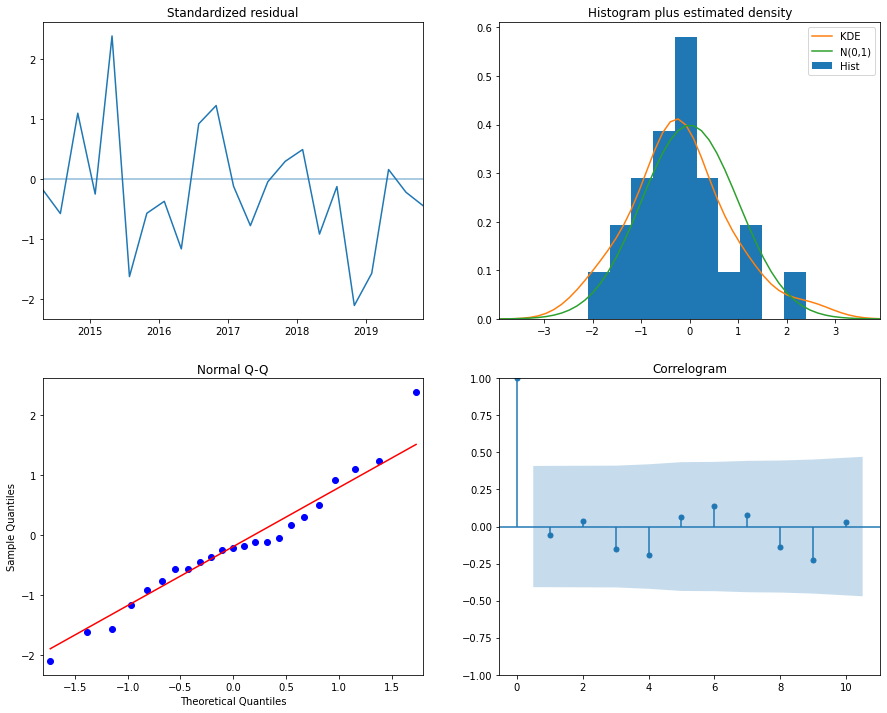

In [19]:
best_result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [20]:
pred = best_result.forecast(2)
pred

2020-01-31    11.834970
2020-04-30    11.865889
Freq: 3M, dtype: float64

In [21]:
import math

pred_log_gdp = np.array([11.313350, 11.490281])
pred_gdp_Q3 = np.exp(pred_log_gdp)

print(pred_gdp_Q3)

[137994.62305353 142327.92426521]


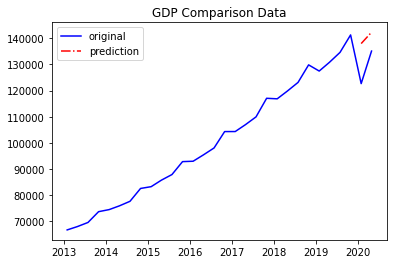

In [26]:
pred_gdp_Q3 = pd.Series(pred_gdp_Q3)
pred_gdp_Q3.index = pd.Index(pd.date_range('20200101',periods=2,freq='3M'))
plt.figsize = (12,8)
plt.plot(data,'b', label='original')
plt.plot(pred_gdp_Q3,'r-.', label='prediction')
plt.title('GDP Comparison Data')
plt.legend()
plt.savefig('fianl')
plt.show()